In [10]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

In [11]:
img = cv2.imread('noisy2.JPG')
# out=cv2.bilateralFilter(img,11,50,7)
# out1=cv2.fastNlMeansDenoisingColored(img)
# cv2.imwrite('noisy1_cleared.jpg', out)
# cv2.imwrite('noisy2_cleared.jpg', out1)


In [12]:
img_arr=np.array(img).astype(float)
print(img_arr.shape)

(933, 1138, 3)


In [13]:
def gaussianKernel(size_x,size_y, sigma_x,sigma_y):
    if size_x%2==0 or size_y%2==0:
        print('Error: Kernel dimensions can only be odd')
        return
    center_x,center_y=size_x//2,size_y//2
    kernel =  np.fromfunction(lambda i, j:  np.exp(-((((i-center_x)/(sigma_x))**2)/2+(((j-center_y)/(sigma_y))**2)/2)), (size_x, size_y))
    
    return kernel 

In [14]:
kernel=gaussianKernel(11,11,7,7)

In [15]:
dim_x,dim_y,dim_z=np.shape(img_arr)
img_arr=img_arr.transpose(2,0,1)
print(np.shape(img_arr))
out_arr=np.zeros(np.shape(img_arr))
kernel_x,kernel_y=np.shape(kernel)
print(np.shape(img_arr[0]))
a1=np.pad(img_arr[0],((kernel_x//2,kernel_x//2),(kernel_y//2,kernel_y//2)))
# print(np.shape(a1))
a2=np.pad(img_arr[1],((kernel_x//2,kernel_x//2),(kernel_y//2,kernel_y//2)))
a3=np.pad(img_arr[2],((kernel_x//2,kernel_x//2),(kernel_y//2,kernel_y//2)))
img_arr_pad=np.array([a1,a2,a3]).transpose(1,2,0)
print(np.shape(img_arr_pad))

(3, 933, 1138)
(933, 1138)
(943, 1148, 3)


In [16]:
range_sigma=50
print(np.shape(img_arr_pad))
out_arr=out_arr.transpose(1,2,0)
for i in range(dim_x):
    for j in range(dim_y):
        for k in range(dim_z):
            center_x,center_y=(2*i+kernel_x)//2,(2*j+kernel_y)//2        
            range_kernel=np.exp(-((img_arr_pad[i:i+kernel_x,j:j+kernel_y,k]-img_arr_pad[center_x,center_y,k])**2)/(2*(range_sigma**2)))
            # print(range_kernel)
            # print(kernel)
            # print(np.shape(range_kernel),np.shape(kernel))
            final_kernel=range_kernel*kernel
            final_kernel=final_kernel/np.sum(final_kernel)
            out_arr[i,j,k]=np.sum(img_arr_pad[i:i+kernel_x,j:j+kernel_y,k]*final_kernel)
            # out_arr[i,j,k]=1

(943, 1148, 3)


True

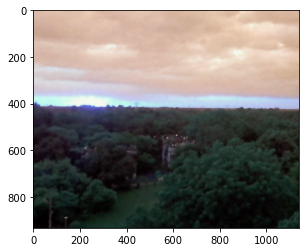

In [17]:
# print(np.shape(out_arr))
out_arr=out_arr.astype(np.uint8)
plt.imshow(out_arr)
cv2.imwrite('noisy3_cleared.jpg', out_arr)

In [18]:
a = [[1, 2], [3, 4]]
c=[[1, 2], [3, 4]]
print(np.array(a),np.array(c))
print(np.array(a)*np.array(c))
a=[a,a,a]
print(np.shape(a))
a1=np.pad(a[0],(1,1))
a2=np.pad(a[1],(1,1))
a3=np.pad(a[2],(1,1))
b=[a1,a2,a3]
print(np.shape(b))
    

[[1 2]
 [3 4]] [[1 2]
 [3 4]]
[[ 1  4]
 [ 9 16]]
(3, 2, 2)
(3, 4, 4)
